In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

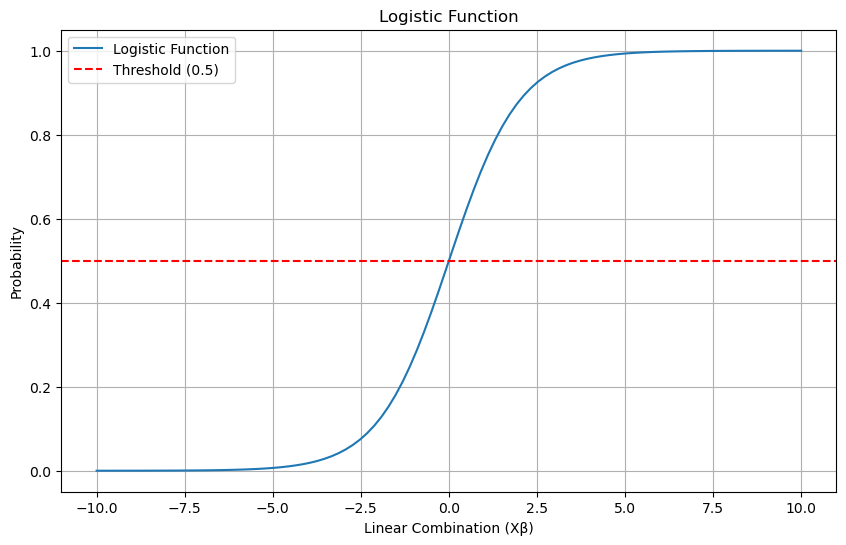

In [24]:
import numpy as np
import matplotlib.pyplot as plt


# 로지스틱 함수 정의
def logistic_function(x):
    return 1 / (1 + np.exp(-x))


# x 값의 범위 설정
x = np.linspace(-10, 10, 100)

# 로지스틱 함수 값 계산
y = logistic_function(x)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Logistic Function")
plt.axhline(0.5, color="r", linestyle="--", label="Threshold (0.5)")
plt.title("Logistic Function")
plt.xlabel("Linear Combination (Xβ)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

# Generating Synthetic Data

In [20]:
# Generate synthetic data
num_samples = 1000
days_since_signup = np.random.randint(1, 365, num_samples)
monthly_payment = np.random.normal(50, 20, num_samples)
order_count = np.random.randint(1, 50, num_samples)
visit_count = np.random.randint(1, 100, num_samples)
membership = np.random.randint(0, 2, num_samples)

# Generate churn variable based on logistic model
logit = (
    1
    - 0.01 * days_since_signup
    - 0.02 * monthly_payment
    + 0.03 * order_count
    - 0.01 * visit_count
    - 0.5 * membership
)
prob_churn = 1 / (1 + np.exp(-logit))
churn = np.random.binomial(1, prob_churn, num_samples)

data_logistic = pd.DataFrame(
    {
        "DaysSinceSignup": days_since_signup,
        "MonthlyPayment": monthly_payment,
        "OrderCount": order_count,
        "VisitCount": visit_count,
        "Membership": membership,
        "Churn": churn,
    }
)

data_logistic.describe()

,DaysSinceSignup,MonthlyPayment,OrderCount,VisitCount,Membership,Churn
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,184.6310,50.538010,24.887000,48.968000,0.495000,0.206000
std,105.1941,19.161805,14.297575,28.275121,0.500225,0.404633
min,1.0000,-27.083737,1.000000,1.000000,0.000000,0.000000
25%,91.0000,37.941256,12.000000,24.000000,0.000000,0.000000
50%,186.0000,50.029619,25.000000,48.000000,0.000000,0.000000
75%,274.2500,63.877460,37.000000,74.000000,1.000000,0.000000
max,364.0000,109.878310,49.000000,99.000000,1.000000,1.000000


In [21]:
# # Box plots
# plt.figure(figsize=(14, 10))

# plt.subplot(2, 3, 1)
# sns.boxplot(data=data_logistic, x="Churn", y="DaysSinceSignup", palette="coolwarm")
# plt.title("Days Since Signup by Churn")

# plt.subplot(2, 3, 2)
# sns.boxplot(data=data_logistic, x="Churn", y="MonthlyPayment", palette="coolwarm")
# plt.title("Monthly Payment by Churn")

# plt.subplot(2, 3, 3)
# sns.boxplot(data=data_logistic, x="Churn", y="OrderCount", palette="coolwarm")
# plt.title("Order Count by Churn")

# plt.subplot(2, 3, 4)
# sns.boxplot(data=data_logistic, x="Churn", y="VisitCount", palette="coolwarm")
# plt.title("Visit Count by Churn")

# plt.subplot(2, 3, 5)
# sns.boxplot(data=data_logistic, x="Churn", y="Membership", palette="coolwarm")
# plt.title("Membership by Churn")

# plt.tight_layout()
# plt.show()

/var/folders/pj/18_x3q214nz79c9kby44797c0000gn/T/ipykernel_68981/3685222865.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Membership", data=data_logistic, ax=axes[2, 0], palette="viridis")
/var/folders/pj/18_x3q214nz79c9kby44797c0000gn/T/ipykernel_68981/3685222865.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=data_logistic, ax=axes[2, 1], palette="coolwarm")


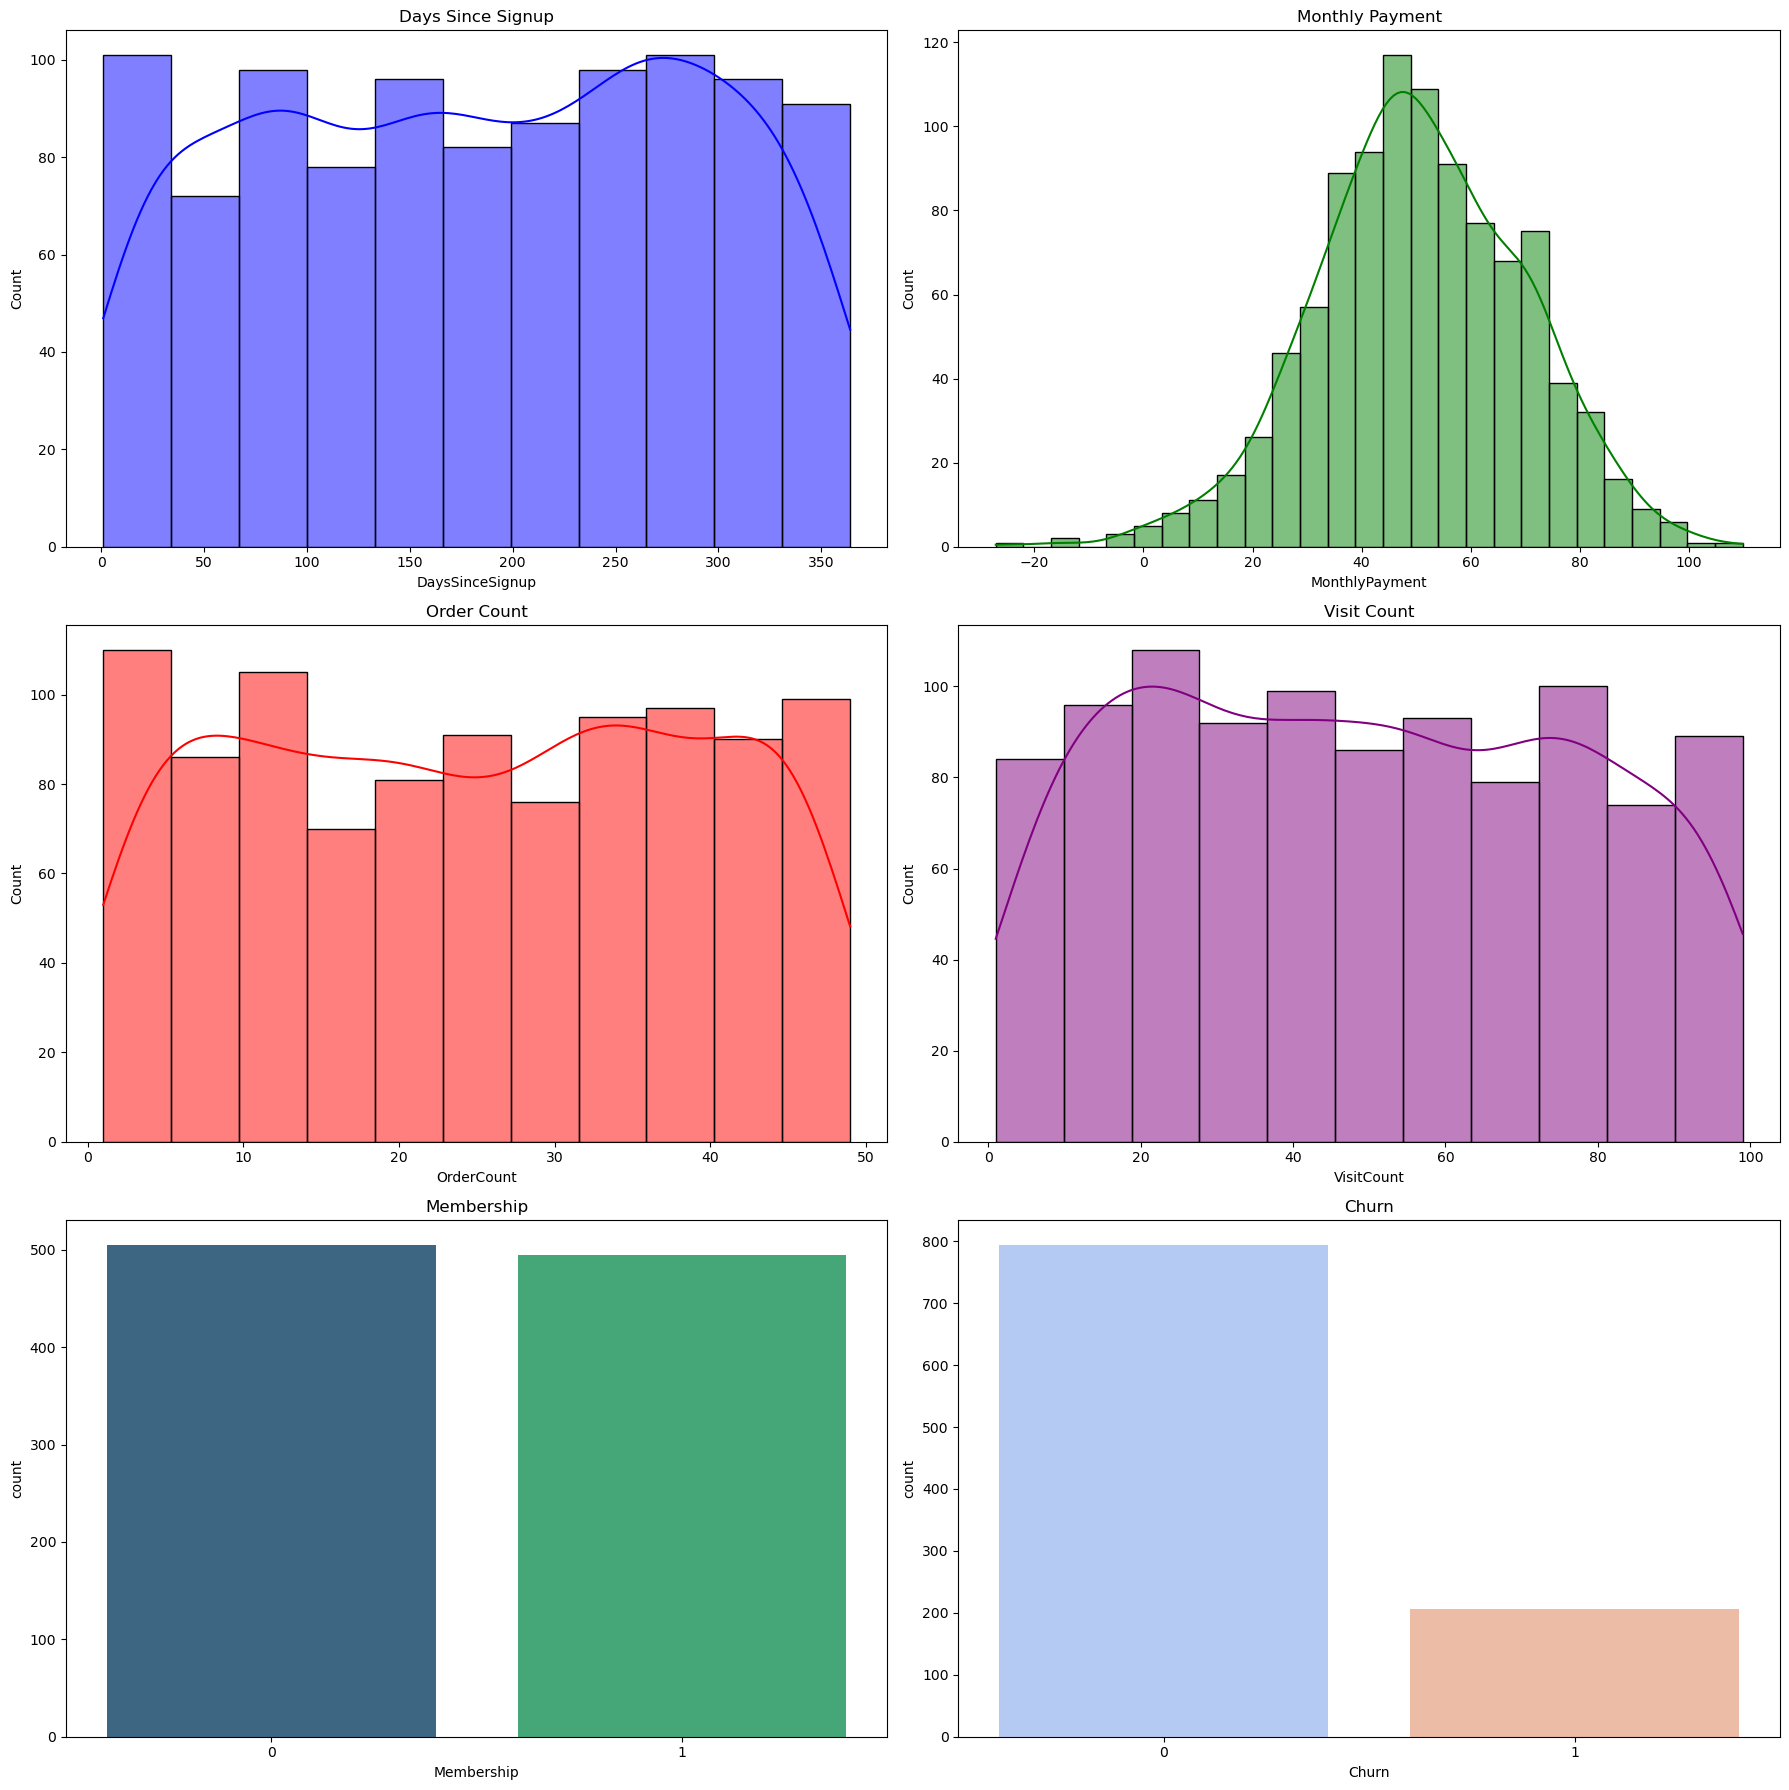

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Days Since Signup
sns.histplot(data_logistic["DaysSinceSignup"], kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Days Since Signup")

# Monthly Payment
sns.histplot(data_logistic["MonthlyPayment"], kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Monthly Payment")

# Order Count
sns.histplot(data_logistic["OrderCount"], kde=True, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Order Count")

# Visit Count
sns.histplot(data_logistic["VisitCount"], kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Visit Count")

# Membership
sns.countplot(x="Membership", data=data_logistic, ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title("Membership")

# Churn
sns.countplot(x="Churn", data=data_logistic, ax=axes[2, 1], palette="coolwarm")
axes[2, 1].set_title("Churn")

plt.tight_layout()
plt.show()

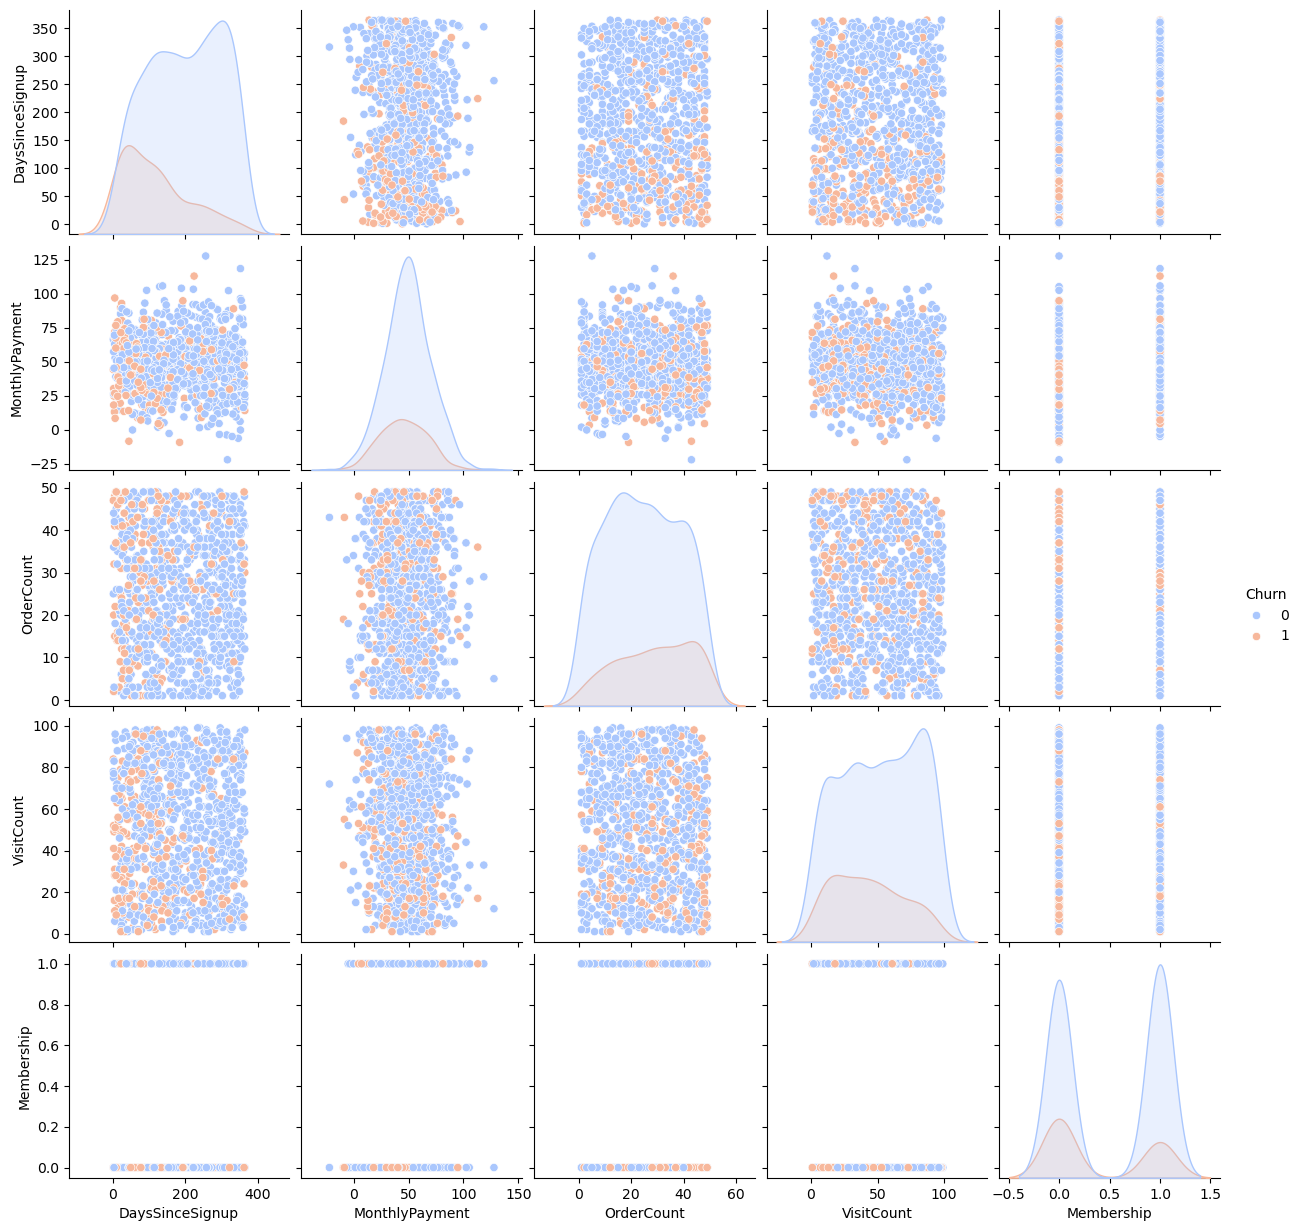

In [7]:
# Pair plot
sns.pairplot(data_logistic, hue="Churn", palette="coolwarm", diag_kind="kde")
plt.show()

In [17]:
# # Feature vs Churn Probability
# plt.figure(figsize=(14, 10))

# plt.subplot(2, 3, 1)
# sns.regplot(
#     data=data_logistic,
#     x="DaysSinceSignup",
#     y="Churn",
#     logistic=True,
#     ci=None,
#     color="blue",
# )
# plt.title("Churn Probability vs. Days Since Signup")

# plt.subplot(2, 3, 2)
# sns.regplot(
#     data=data_logistic,
#     x="MonthlyPayment",
#     y="Churn",
#     logistic=True,
#     ci=None,
#     color="green",
# )
# plt.title("Churn Probability vs. Monthly Payment")

# plt.subplot(2, 3, 3)
# sns.regplot(
#     data=data_logistic, x="OrderCount", y="Churn", logistic=True, ci=None, color="red"
# )
# plt.title("Churn Probability vs. Order Count")

# plt.subplot(2, 3, 4)
# sns.regplot(
#     data=data_logistic,
#     x="VisitCount",
#     y="Churn",
#     logistic=True,
#     ci=None,
#     color="purple",
# )
# plt.title("Churn Probability vs. Visit Count")

# plt.subplot(2, 3, 5)
# sns.regplot(
#     data=data_logistic,
#     x="Membership",
#     y="Churn",
#     logistic=True,
#     ci=None,
#     color="orange",
# )
# plt.title("Churn Probability vs. Membership")

# plt.tight_layout()
# plt.show()

# Model Fitting

In [23]:
# Fit the logistic regression model
logistic_model = smf.logit(
    "Churn ~ DaysSinceSignup + MonthlyPayment + OrderCount + VisitCount + Membership",
    data=data_logistic,
).fit()

# Print the summary
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.414349
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Jul 2024   Pseudo R-squ.:                  0.1853
Time:                        23:44:48   Log-Likelihood:                -414.35
converged:                       True   LL-Null:                       -508.61
Covariance Type:            nonrobust   LLR p-value:                 8.094e-39
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5715      0.359      1.594      0.111      -0.131       1.274
DaysSinceSignu

In [19]:
# # Predict and plot the results
# data_logistic["PredictedChurn"] = logistic_model.predict(
#     data_logistic[
#         ["DaysSinceSignup", "MonthlyPayment", "OrderCount", "VisitCount", "Membership"]
#     ]
# )

# plt.figure(figsize=(10, 6))
# plt.scatter(
#     data_logistic["DaysSinceSignup"],
#     data_logistic["Churn"],
#     color="blue",
#     alpha=0.5,
#     label="Actual Churn",
# )
# plt.scatter(
#     data_logistic["DaysSinceSignup"],
#     data_logistic["PredictedChurn"],
#     color="red",
#     alpha=0.5,
#     label="Predicted Churn",
# )
# plt.xlabel("Days Since Signup")
# plt.ylabel("Churn Probability")
# plt.title("Logistic Regression: Churn Prediction")
# plt.legend()
# plt.show()